<a href="https://colab.research.google.com/github/jonaidsharif/Twitter-And-Reddit-Sentiment-Analysis/blob/main/sentiment_twitter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Machine Learning/Twitter and Reddit Sentimental analysis Dataset/Twitter_Data.csv'
data = pd.read_csv(file_path)
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#data preprocessing
# Remove duplicate rows
data.drop_duplicates(subset='clean_text', inplace=True)

# Lowercase conversion
data['clean_text'] = data['clean_text'].str.lower()

# Removing special characters
data['clean_text'] = data['clean_text'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenization
data['clean_text'] = data['clean_text'].apply(lambda x: nltk.word_tokenize(x))

# Removing stopwords
stop_words = set(stopwords.words('english'))
data['clean_text'] = data['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['clean_text'] = data['clean_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join tokens back to string
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join(x))

In [ ]:
data

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0
...,...,...
162975,crore paid neerav modi recovered congress lead...,-1.0
162976,dear r terrorist payal gawar modi killing plus...,-1.0
162977,cover interaction forum left,0.0
162978,big project came india modi dream project happ...,0.0


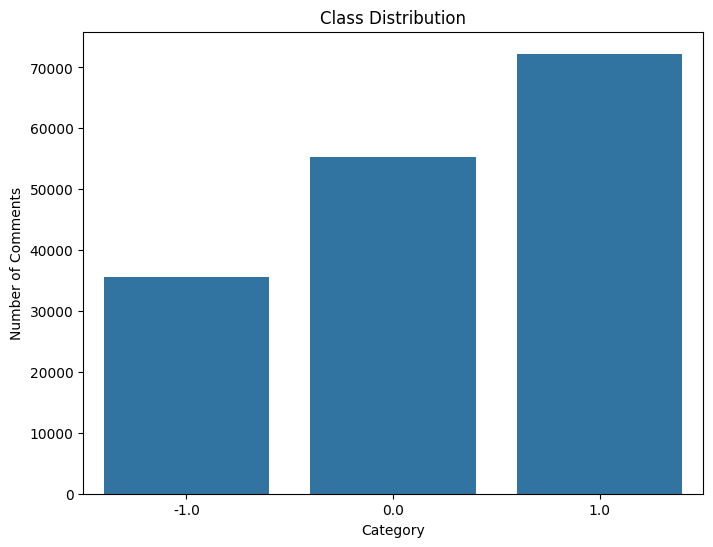

In [ ]:
# prompt: Visualization
# Class Distribution:
# Word Frequency:

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.show()

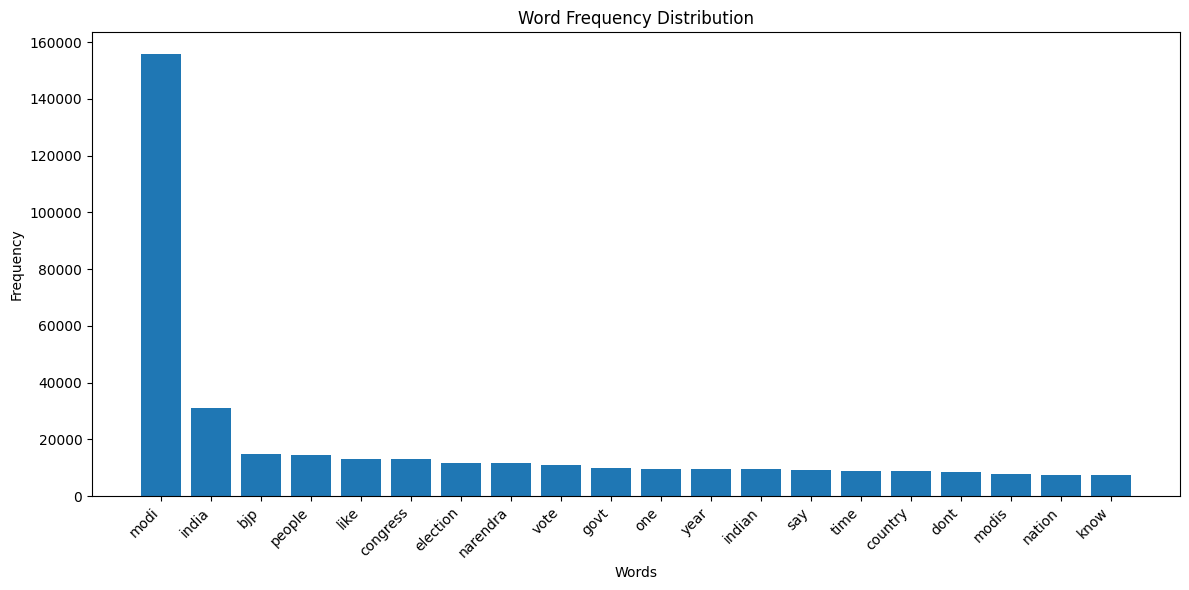

In [ ]:
# Word Frequency
all_words = ' '.join(data['clean_text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)  # Top 20 most frequent words

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

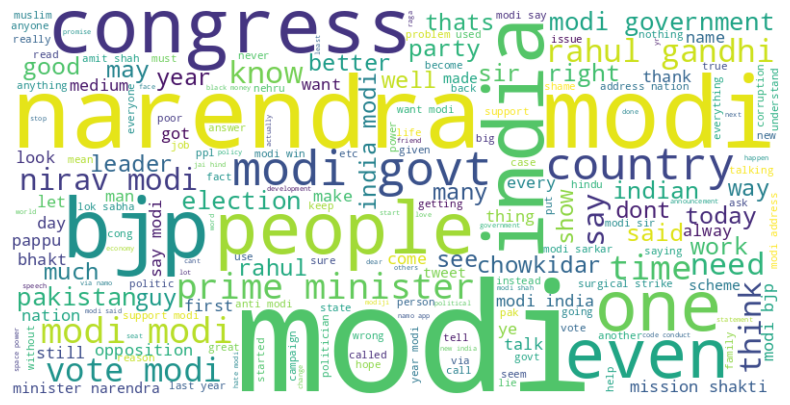

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame and 'clean_text' column are already defined as in the provided code.

# Join all cleaned texts into a single text
text = " ".join(text for text in data.clean_text)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

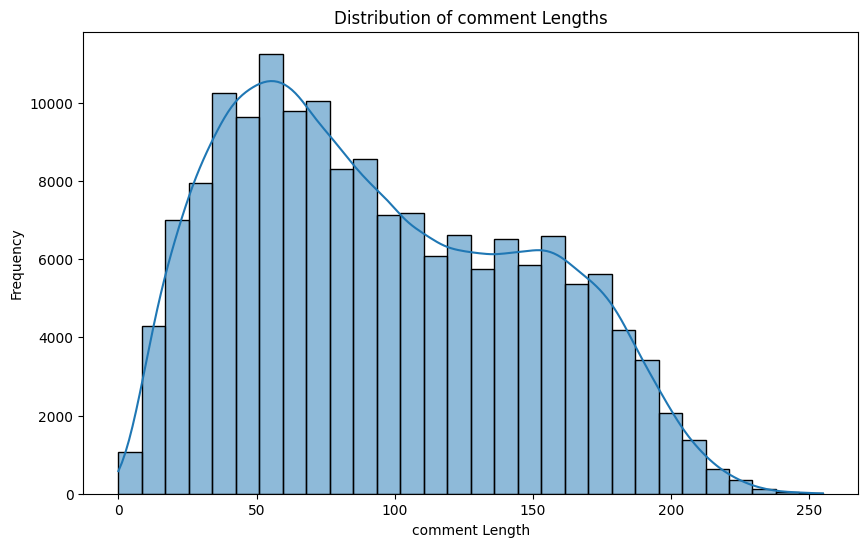

In [ ]:
# Calculate text lengths
data['comment_length'] = data['clean_text'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['comment_length'], bins=30, kde=True)
plt.title('Distribution of comment Lengths')
plt.xlabel('comment Length')
plt.ylabel('Frequency')
plt.show()

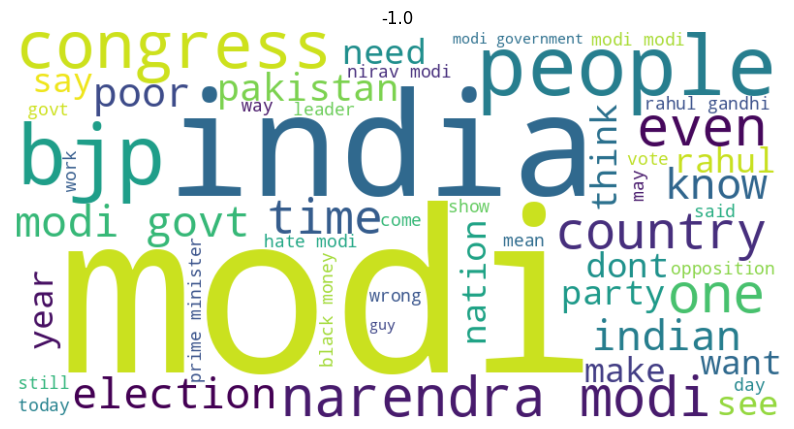

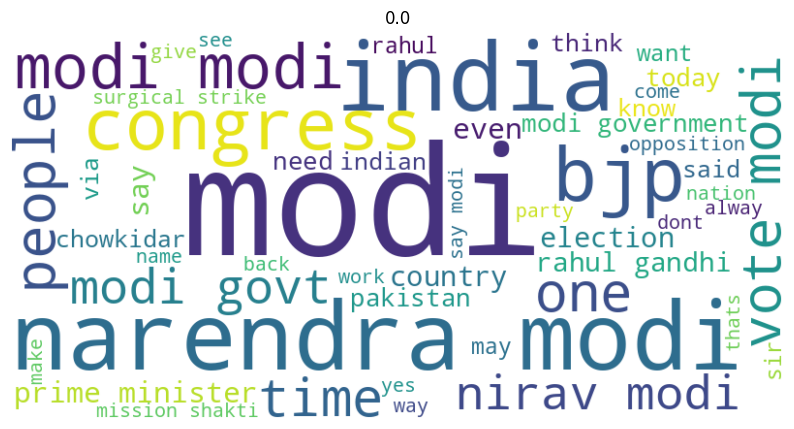

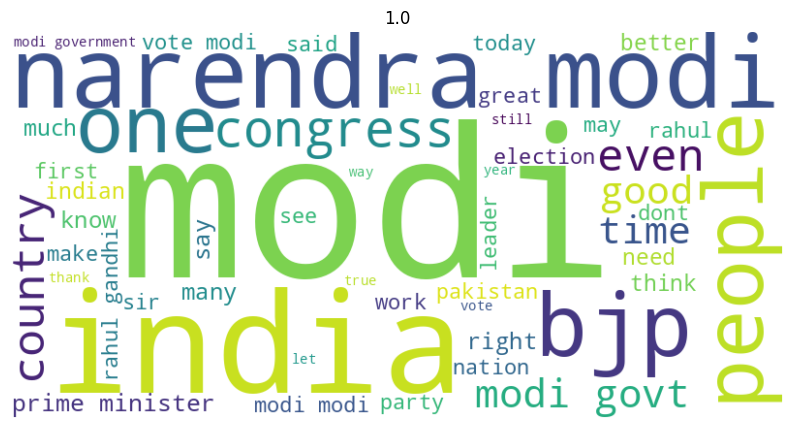

Skipping category 'nan' due to empty subset or no text data.


In [ ]:
# Get unique categories of texts
categories = data['category'].unique()

# Create a word cloud for each category, each in its own figure
for category in categories:
    # Skip categories that result in empty subsets or empty text
    subset = data[data['category'] == category]
    if subset.empty or subset['clean_text'].empty:
        print(f"Skipping category '{category}' due to empty subset or no text data.")
        continue  # Skip to the next category

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
    text = " ".join(text for text in subset.clean_text)

    # Check if text is empty after joining
    if not text:
        print(f"Skipping category '{category}' due to empty text after joining.")
        continue  # Skip to the next category

    wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category)
    plt.show()  # This will display the figure immediately

In [ ]:
# prompt: Word2Vec Model Training

from gensim.models import Word2Vec

# Prepare the data for Word2Vec
sentences = [text.split() for text in data['clean_text']]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

# Example usage: Get the vector representation of a word
vector = model.wv['example']  # Replace 'example' with any word from your vocabulary
print(vector)


# Find similar words
similar_words = model.wv.most_similar('example', topn=10) # Replace 'example' with any word from your vocabulary
similar_words

[ 5.66338241e-01  1.95480928e-01  5.17383702e-02  6.18935764e-01
  2.30178058e-01 -6.37481511e-01  4.62928921e-01  4.81503993e-01
 -1.04998626e-01 -3.71346980e-01 -6.17420733e-01 -4.79625165e-01
  2.56720990e-01 -2.54765213e-01  2.30020821e-01 -4.24333185e-01
 -9.42477226e-01 -1.02597451e+00  5.91524065e-01 -3.31659257e-01
  1.96870521e-01  9.57598537e-02  6.79993689e-01 -5.97332478e-01
  1.24187253e-01  4.79375154e-01 -3.45655173e-01  3.99738848e-01
 -5.34324884e-01 -2.39519551e-01 -6.05470464e-02 -5.95374294e-02
  1.13225162e+00 -5.03587127e-01 -2.90039927e-01 -5.99884130e-02
  2.17467751e-02 -3.99148971e-01 -8.17167997e-01 -8.35006312e-02
  3.00141275e-01 -1.39637887e+00 -4.83274102e-01  6.68363348e-02
  1.56323221e-02  2.94795603e-01 -8.04489665e-03  8.72880295e-02
  2.27016076e-01  6.69196606e-01  5.03871739e-01 -5.05516469e-01
  5.76941252e-01 -8.72152805e-01 -4.24683660e-01  1.89153776e-02
 -6.33771956e-01 -5.27839899e-01 -1.13999772e+00  2.61489928e-01
  5.59783340e-01  1.68791

[('communicator', 0.7027584910392761),
 ('blunder', 0.6829174160957336),
 ('talent', 0.6754311919212341),
 ('folk', 0.6657130122184753),
 ('uncorrupt', 0.6651414632797241),
 ('doer', 0.6608592867851257),
 ('orator', 0.6607733964920044),
 ('threatsnow', 0.6519954800605774),
 ('practises', 0.6497529149055481),
 ('comedian', 0.6481197476387024)]

In [ ]:
# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model.save("custom_word2vec.model")

sentiment
positive    68329
neutral     59570
negative    35078
Name: count, dtype: int64


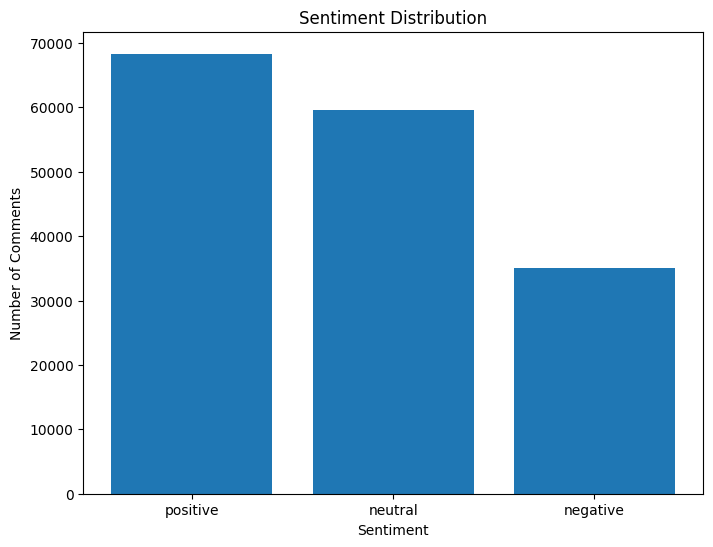

In [ ]:
# prompt: sentiment analysis from this dataset

from textblob import TextBlob

# Assuming 'data' DataFrame and 'clean_comment' column are already defined

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'clean_comment' column
data['sentiment_polarity'] = data['clean_text'].apply(get_sentiment)

# Classify sentiment as positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['sentiment_polarity'].apply(classify_sentiment)

# Analyze sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [ ]:
# prompt: Detect emotion from this dataset with bert model evaluate model

!pip install transformers
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")
from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Example usage:
results = classifier(list(data['clean_text'].head(10))) # analyze the first 10 texts

for result in results:
  print(f"Text: {result['label']}, Sentiment: {result['score']}")

  print(f"Text: {result['label']}, Sentiment: {result['score']}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Text: NEGATIVE, Sentiment: 0.9268476366996765
Text: NEGATIVE, Sentiment: 0.9268476366996765
Text: NEGATIVE, Sentiment: 0.999294638633728
Text: NEGATIVE, Sentiment: 0.999294638633728
Text: POSITIVE, Sentiment: 0.7827346324920654
Text: POSITIVE, Sentiment: 0.7827346324920654
Text: NEGATIVE, Sentiment: 0.9996005892753601
Text: NEGATIVE, Sentiment: 0.9996005892753601
Text: POSITIVE, Sentiment: 0.9924842715263367
Text: POSITIVE, Sentiment: 0.9924842715263367
Text: POSITIVE, Sentiment: 0.9960861206054688
Text: POSITIVE, Sentiment: 0.9960861206054688
Text: POSITIVE, Sentiment: 0.9558385014533997
Text: POSITIVE, Sentiment: 0.9558385014533997
Text: POSITIVE, Sentiment: 0.941315770149231
Text: POSITIVE, Sentiment: 0.941315770149231
Text: POSITIVE, Sentiment: 0.9472581148147583
Text: POSITIVE, Sentiment: 0.9472581148147583
Text: NEGATIVE, Sentiment: 0.870451033115387
Text: NEGATIVE, Sentiment: 0.870451033115387
